In [1]:
import matplotlib.colors as mcolors
import matplotlib.animation as ma
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from itertools import product
import pandas as pd
import numpy as np
import numba as nb
import imageio
import os
import shutil

randomSeed = 100

%matplotlib inline
%config InlineBackend.figure_format = "retina"

new_cmap = mcolors.LinearSegmentedColormap.from_list(
    "new", plt.cm.jet(np.linspace(0, 1, 256)) * 0.85, N=256
)

@nb.njit
def colors_idx(phaseTheta):
    return np.floor(256 - phaseTheta / (2 * np.pi) * 256).astype(np.int32)

import seaborn as sns

sns.set_theme(
    style="ticks", 
    font_scale=1.1, rc={
    'figure.figsize': (6, 5),
    'axes.facecolor': 'white',
    'figure.facecolor': 'white',
    'grid.color': '#dddddd',
    'grid.linewidth': 0.5,
    "lines.linewidth": 1.5,
    'text.color': '#000000',
    'figure.titleweight': "bold",
    'xtick.color': '#000000',
    'ytick.color': '#000000'
})

plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['animation.ffmpeg_path'] = "/opt/conda/bin/ffmpeg"

from main import *
from multiprocessing import Pool
import pandas as pd

$$
\begin{aligned}
	\dot{\mathbf{x}}_i&=v\left[ \begin{array}{c}
	\cos \phi _i\\
	\sin \phi _i\\
\end{array} \right]\\
	\dot{\phi}_i&=J\sin \left( \theta _i-\phi _i \right) \sum_{j=1}^N{G\left( \mathbf{x}_i-\mathbf{x}_j \right) \cos \left( \theta _j-\theta _i \right)}\\
	\dot{\theta}_i&=\omega _i+K\sum_{j=1}^N{G\left( \mathbf{x}_i-\mathbf{x}_j \right) \sin \left( \theta _j-\theta _i \right)}\\
\end{aligned}
$$


  0%|          | 0/1000 [00:00<?, ?it/s]

Text(0.5, 1.0, '$K=0,\\ J=-0.5,\\ d_0=0.1$')

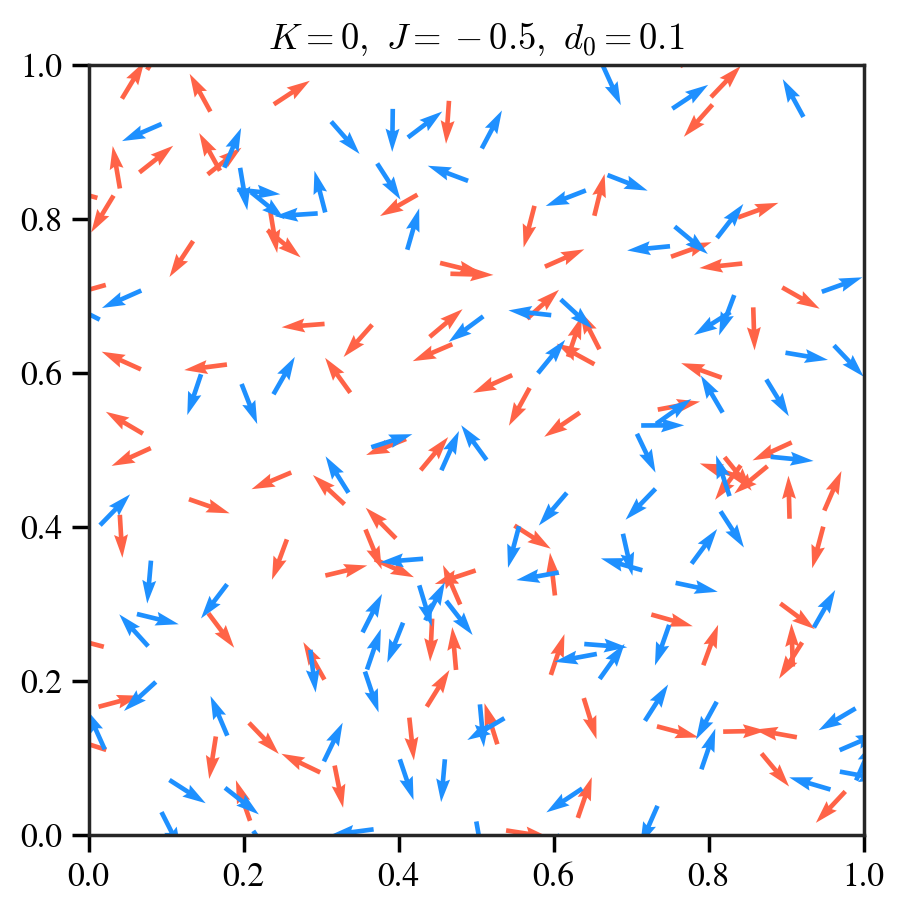

In [20]:
model = SelfAdaptiveChiralOsc(
    K=0, J=-0.5, distanceD0=0.1, boundaryLength=1, agentsNum=200, speedV=3,
    tqdm=True, savePath="./data", randomSeed=10, overWrite=True, dt=0.05
)
model.freqOmega = model.freqOmega * 0.1
model.run(1000)
model.plot()
plt.title(rf"$K={model.K},\ J={model.J},\ d_0={model.distanceD0}$")

Text(0, 0.5, '$\\phi$')

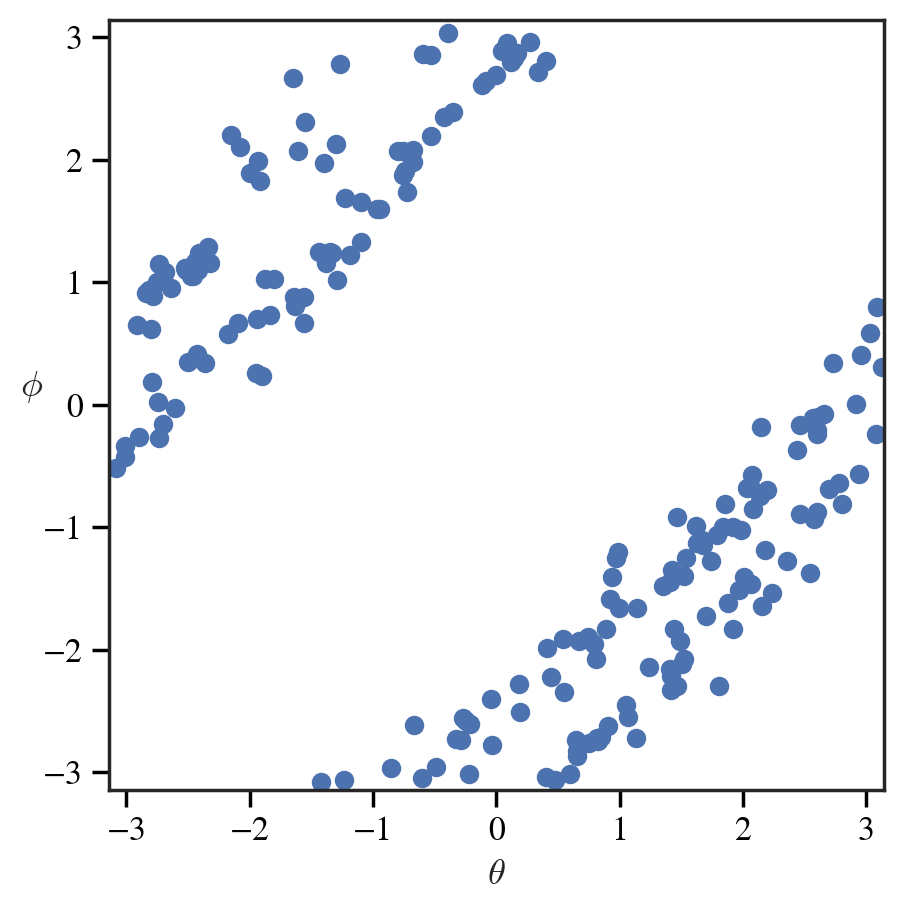

In [21]:
plt.figure(figsize=(5, 5))
plt.scatter(model.phaseTheta, model.vecAnglePhi)
plt.xlim(-np.pi, np.pi)
plt.ylim(-np.pi, np.pi)
plt.xlabel(r"$\theta$")
plt.ylabel(r"$\phi$", rotation=0)

  0%|          | 0/1000 [00:00<?, ?it/s]

Text(0.5, 1.0, '$K=0.06,\\ J=0.5,\\ d_0=0.1$')

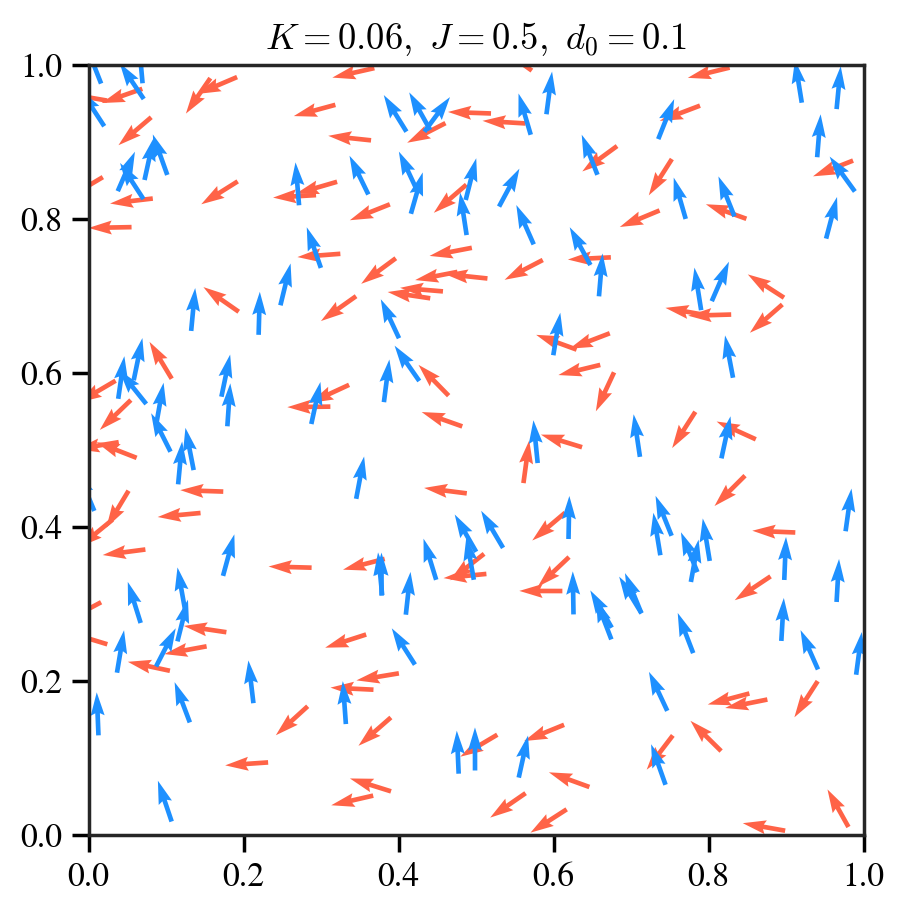

In [18]:
model = SelfAdaptiveChiralOsc(
    K=0.06, J=0.5, distanceD0=0.1, boundaryLength=1, agentsNum=200, speedV=3,
    tqdm=True, savePath="./data", randomSeed=10, overWrite=True, dt=0.05
)
model.freqOmega = model.freqOmega * 0.1
model.run(1000)
model.plot()
plt.title(rf"$K={model.K},\ J={model.J},\ d_0={model.distanceD0}$")

Text(0, 0.5, '$\\phi$')

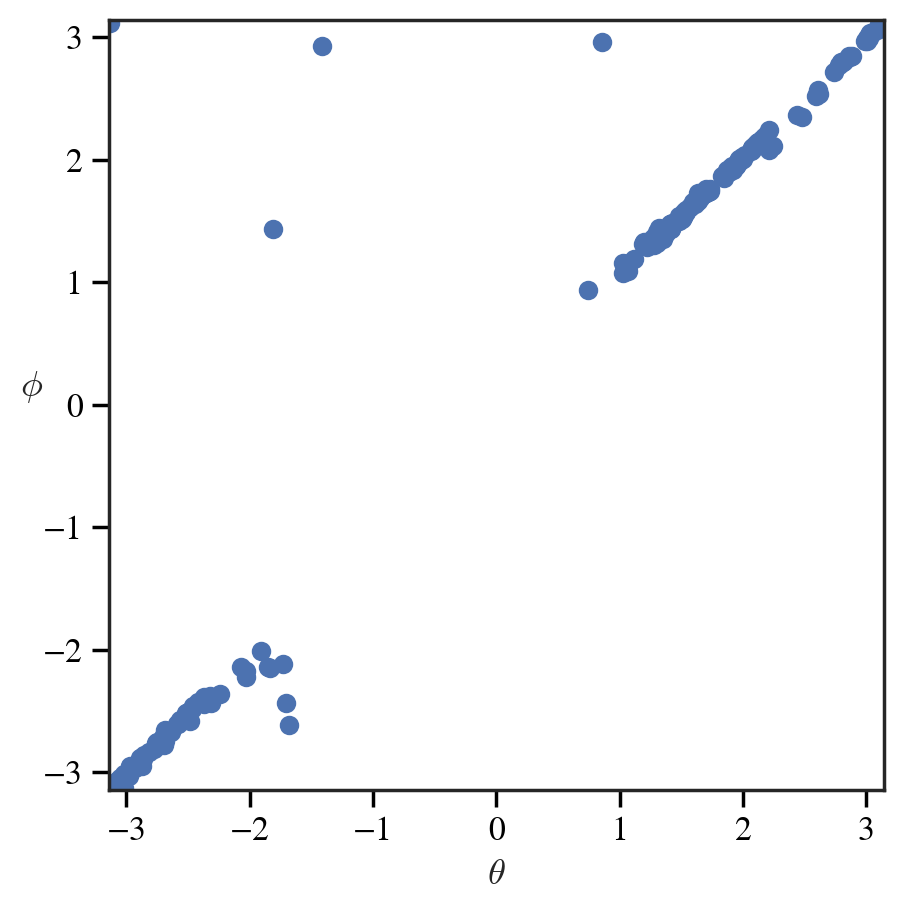

In [19]:
plt.figure(figsize=(5, 5))
plt.scatter(model.phaseTheta, model.vecAnglePhi)
plt.xlim(-np.pi, np.pi)
plt.ylim(-np.pi, np.pi)
plt.xlabel(r"$\theta$")
plt.ylabel(r"$\phi$", rotation=0)

<!-- <font face="Times New Roman"> -->

$$
\begin{aligned}
	\mathbf{\dot{x}}_i&=v\left[ \begin{array}{c}
	\cos \phi _i\\
	\sin \phi _i\\
\end{array} \right]\\
	\dot{\phi}_i&=J\sum_{j=1}^N{G\left( \mathbf{x}_i-\mathbf{x}_j \right) \sin \left( \phi _j-\phi _i \right) \cos \left( \theta _j-\theta _i \right)}\\
	\dot{\theta}_i&=\omega _i+K\sum_{j=1}^N{G\left( \mathbf{x}_i-\mathbf{x}_j \right) \sin \left( \theta _j-\theta _i \right)}\\
\end{aligned}
$$
Inspired by
$$
\begin{aligned}
	\dot{x}&=v_i+\frac{J}{N}\sum_{j=1}^N{\sin \left( x_j-x_i \right) \cos \left( \theta _j-\theta _i \right)}\\
	\dot{\theta}_i&=\omega _i+\frac{K}{N}\sum_{j=1}^N{\sin \left( \theta _j-\theta _i \right) \cos \left( x_j-x_i \right)}\\
\end{aligned}
$$


  0%|          | 0/1000 [00:00<?, ?it/s]

Text(0.5, 1.0, '$K=0,\\ J=0.5,\\ d_0=0.1$')

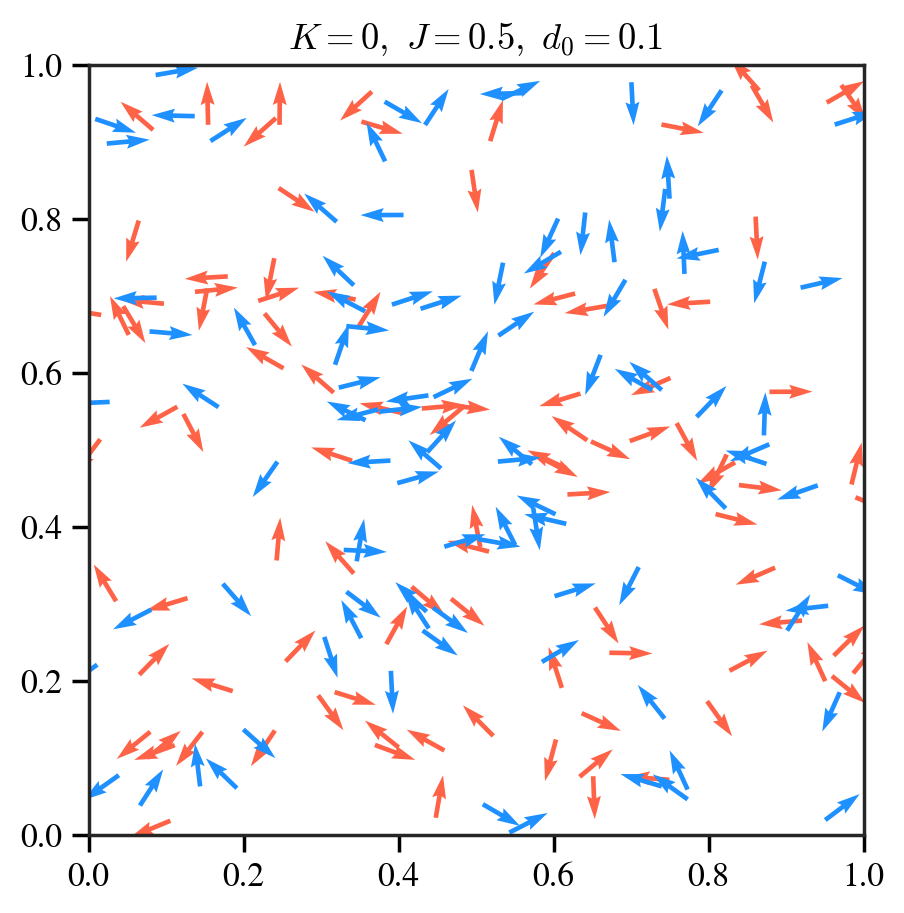

In [2]:
model = SelfAdaptiveChiralSW(
    K=0, J=0.5, distanceD0=0.1, boundaryLength=1, agentsNum=200, speedV=3,
    tqdm=True, savePath="./data", randomSeed=10, overWrite=True, dt=0.05
)
model.freqOmega = model.freqOmega * 0.1
model.run(1000)
model.plot()
plt.title(rf"$K={model.K},\ J={model.J},\ d_0={model.distanceD0}$")

Text(0, 0.5, '$\\phi$')

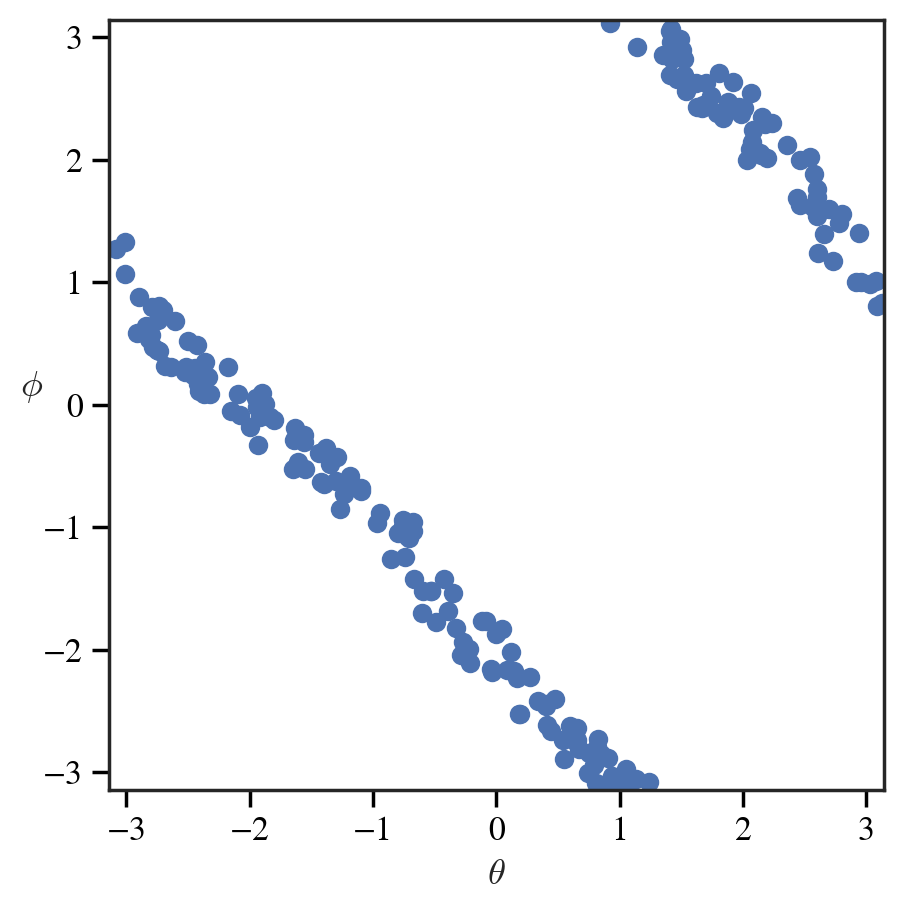

In [3]:
plt.figure(figsize=(5, 5))
plt.scatter(model.phaseTheta, model.vecAnglePhi)
plt.xlim(-np.pi, np.pi)
plt.ylim(-np.pi, np.pi)
plt.xlabel(r"$\theta$")
plt.ylabel(r"$\phi$", rotation=0)

$$\phi_i=-\theta_i + C$$
$$
\dot{\mathbf{x}}_i=v\left[ \begin{array}{c}
	\cos \phi _i\\
	\sin \phi _i\\
\end{array} \right] =v\left[ \begin{array}{c}
	\cos \left( -\theta _i+C \right)\\
	\sin \left( -\theta _i+C \right)\\
\end{array} \right] 
$$

  0%|          | 0/1000 [00:00<?, ?it/s]

Text(0.5, 1.0, '$K=0.1,\\ J=0.5,\\ d_0=0.1$')

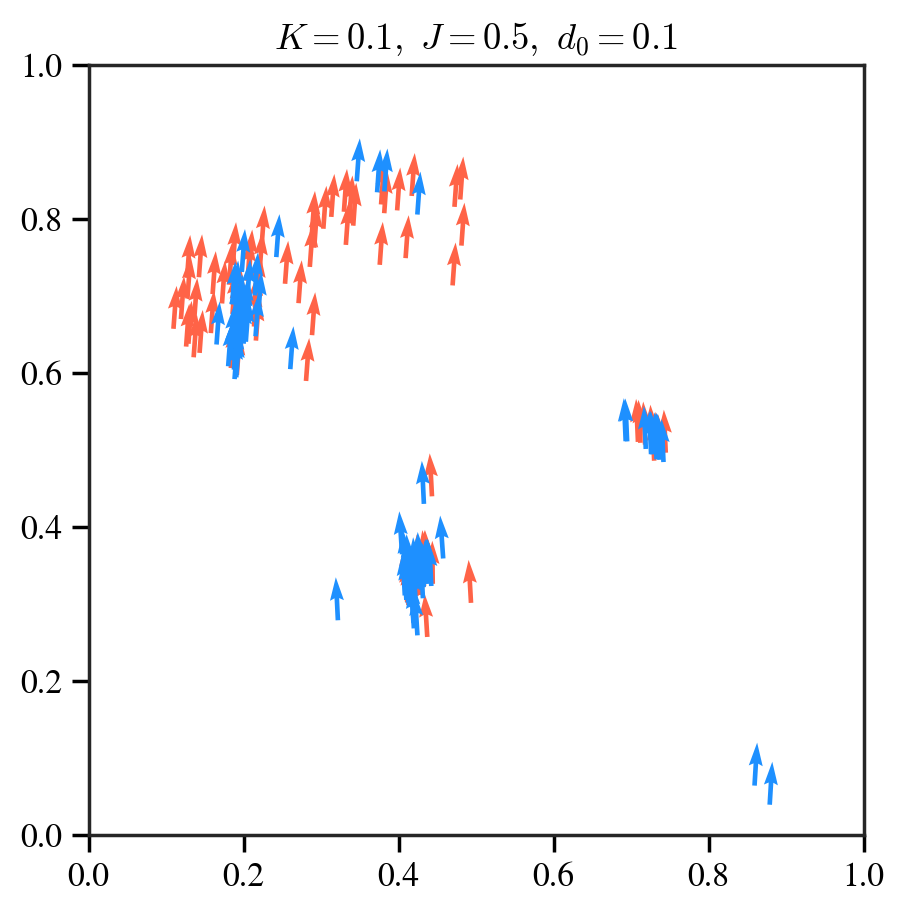

In [12]:
model = SelfAdaptiveChiralSW(
    K=0.1, J=0.5, distanceD0=0.1, boundaryLength=1, agentsNum=200, speedV=3,
    tqdm=True, savePath="./data", randomSeed=10, overWrite=True, dt=0.05
)
model.freqOmega = model.freqOmega * 0.1
model.run(1000)
model.plot()
plt.title(rf"$K={model.K},\ J={model.J},\ d_0={model.distanceD0}$")

Text(0, 0.5, '$\\phi$')

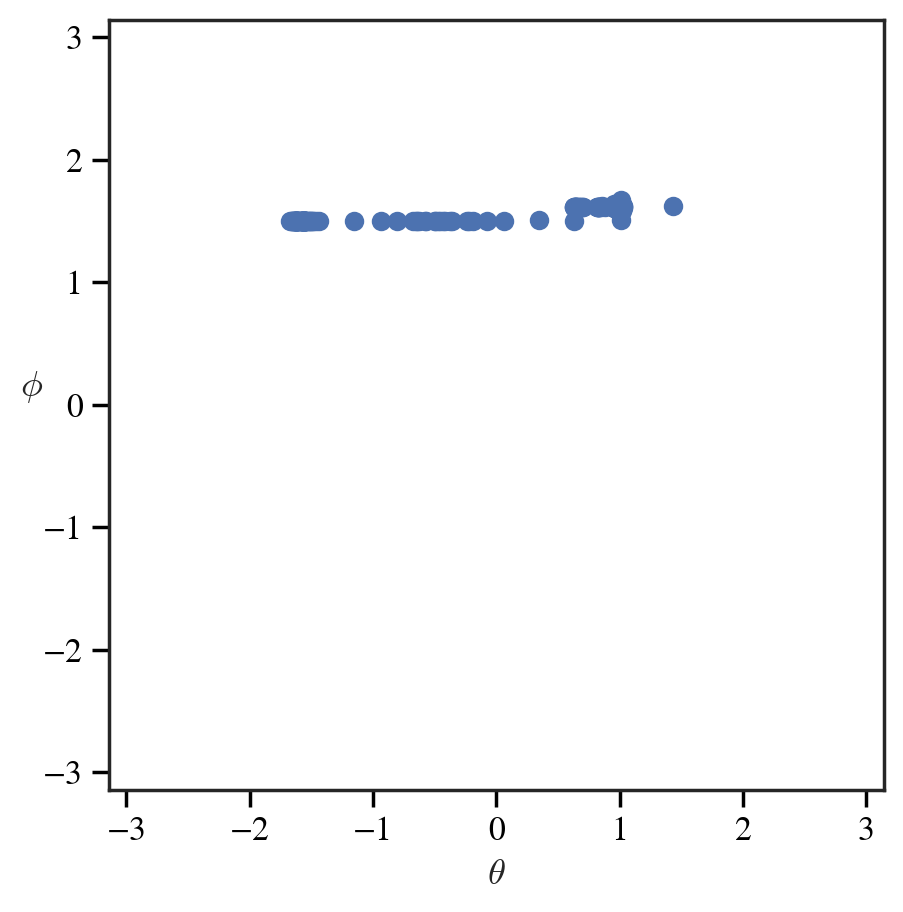

In [13]:
plt.figure(figsize=(5, 5))
plt.scatter(model.phaseTheta, model.vecAnglePhi)
plt.xlim(-np.pi, np.pi)
plt.ylim(-np.pi, np.pi)
plt.xlabel(r"$\theta$")
plt.ylabel(r"$\phi$", rotation=0)